# MOUS comparison

When talking with Crystal, I realized that Andy and I have different numbers of MOUSes in our databases. I'm going to check out why that is.

In [76]:
from astropy.table import Table, vstack
import pickle
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import pandas as pd
from astroquery.alma import Alma as alma

In [34]:
# from Andy
def under_to_slash(uid):
    """
    Purpose: 
        Transition a given UID in "___" form to "://" form.

    Inputs: 
        UID : string
            An ALMA UID string (e.g. ASDM, MOUS)

    Outputs:
        UID in opposite form

    Example:
        >>> mous = 'uid___A001_X1341_X1b'
        >>> mous = under_to_slash(mous)
        >>> print(mous)
        uid://A001/X1341/X1b
    """
    # If it's empty, return it.
    if not uid:
        return uid
    # If it's in the correct form already, simply return it.
    if '://' in uid:
        return uid
    # Replace all underscores with slashes, split (and thus 
    # remove) the first slash and join it with a colon.
    return ':'.join(uid.replace("_", "/").split("/",1))


In [35]:
def slash_to_under(uid):
    """
    Purpose: 
        Transition a given UID in "://" form to "___" form.

    Inputs: 
        UID : string
            An ALMA UID string (e.g. ASDM, MOUS)

    Outputs:
        UID in opposite form

    Example:
        >>> mous = 'uid://A001/X1341/X1b'
        >>> mous = slash_to_under(mous)
        >>> print(mous)
        uid___A001_X1341_X1b
    """
    # If it's empty, return it
    if not uid:
        return uid
    # If it's in the correct form already, simply return it.
    if '___' in uid:
        return uid
    # Simply replace all colon and slash chararcters with underscores
    return uid.replace(":", "_").replace("/", "_")


In [15]:
# Read Remy's scrape pickle
results = pickle.load(open('allc7_stats.20220705.pkl','rb'))
rpd  = pd.DataFrame(results).transpose()

In [17]:
len(rpd)

2583

In [99]:
cycle7 = Table.read('result_table_cycle7_with_calc_values_20220914.csv')

In [100]:
len(cycle7)

51340

In [101]:
cycle7.columns

<TableColumns names=('obs_publisher_did','facility_name','instrument_name','obs_id','dataproduct_type','calib_level','target_name','s_ra','s_dec','s_fov','s_resolution','t_min','t_max','t_exptime','t_resolution','em_min','em_max','em_res_power','pol_states','o_ucd','access_url','access_format','proposal_id','data_rights','gal_longitude','gal_latitude','band_list','em_resolution','bandwidth','antenna_arrays','is_mosaic','spatial_resolution','frequency_support','frequency','velocity_resolution','publication_year','proposal_abstract','schedblock_name','sensitivity_10kms','cont_sensitivity_bandwidth','pwv','group_ous_uid','member_ous_uid','asdm_uid','type','scan_intent','science_observation','spatial_scale_max','qa2_passed','science_keyword','scientific_category','collections','array','points_per_fov','spw_freq','spw_specwidth','spw_nchan','spw_nchan_max','mitigated','failed_mitigation_nbin1','failed_mitigation_nbin2','ntarget','pb','cell','imsize')>

In [102]:
len(np.unique(cycle7['member_ous_uid']))

2927

In [103]:
np.unique(cycle7['array'])

12m
7m
TP


In [105]:
len(np.unique(cycle7[cycle7['array'] != 'TP']['member_ous_uid']))

2717

In [115]:
len(np.unique(cycle7[cycle7['array'] == 'TP']['member_ous_uid']))

210

In [25]:
rpd.columns

Index(['project', 'plversion', 'procedure', 'nant', 'totaltime', 'imgtime',
       'cubetime', 'aggtime', 'fctime', 'nEB', 'npt', 'nscan', 'reptgt',
       'nscience', 'nspw', 'webpredrms', 'webcontrms', 'webcontBW', 'webfreq',
       'webbm', 'webdirtyDR', 'webcontpk', 'allowedcubesize',
       'allowedcubelimit', 'predcubesize', 'mitigatedcubesize',
       'allowedprodsize', 'initialprodsize', 'mitigatedprodsize', 'mitigated',
       'mit_nbins', 'mit_hm_imsize', 'mit_hm_cell', 'mit_field', 'mit_spw'],
      dtype='object')

In [27]:
np.unique(rpd['procedure'])

array(['hifa_calimage', 'hifa_calimage_NOrenorm', 'hifa_calimage_renorm',
       'hifa_image'], dtype=object)

(array([ 772.,  131.,    0.,    0.,    0.,    2.,   42.,  373., 1129.,
         134.]),
 array([6.0, 10.6, 15.2, 19.799999999999997, 24.4, 29.0,
        33.599999999999994, 38.199999999999996, 42.8, 47.4, 52.0],
       dtype=object),
 <BarContainer object of 10 artists>)

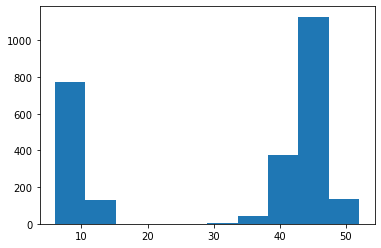

In [29]:
plt.hist(rpd['nant'])

In [114]:
len(rpd['nant'])

2583

In [106]:
archive_mous_list = np.unique(cycle7['member_ous_uid'])

In [107]:
archive_mous_list

uid://A001/X1465/X1002
uid://A001/X1465/X1004
uid://A001/X1465/X1008
uid://A001/X1465/X100a
uid://A001/X1465/X100e
uid://A001/X1465/X1010
uid://A001/X1465/X1014
uid://A001/X1465/X1016
uid://A001/X1465/X101a
uid://A001/X1465/X101c
uid://A001/X1465/X1020


In [108]:
len(archive_mous_list)

2927

In [109]:
len(rpd)

2583

In [79]:
# calculate which pickle values aren't in archive MOUS list
final = ''
for val in rpd.index:
    newval = under_to_slash(val)
    if newval not in archive_mous_list:
        print("MOUS not in archive MOUS list: "+newval)
        result = alma.query_tap(f"SELECT * FROM ivoa.obscore WHERE member_ous_uid like '"+newval+"'").to_table()
        tmptab = result['proposal_id','member_ous_uid','schedblock_name','target_name','science_keyword','scientific_category','science_observation']
        if not final:
            final = tmptab
        else:
            final = vstack([final,tmptab])

MOUS not in archive MOUS list: uid://A001/X1465/X1909
MOUS not in archive MOUS list: uid://A001/X1465/X23eb
MOUS not in archive MOUS list: uid://A001/X1465/X23f3
MOUS not in archive MOUS list: uid://A001/X14c3/Xb84
MOUS not in archive MOUS list: uid://A001/X1528/X31b
MOUS not in archive MOUS list: uid://A001/X1583/X29
MOUS not in archive MOUS list: uid://A001/X1586/X23
MOUS not in archive MOUS list: uid://A001/X1586/X2c
MOUS not in archive MOUS list: uid://A001/X1469/X103
MOUS not in archive MOUS list: uid://A001/X1469/X107
MOUS not in archive MOUS list: uid://A001/X1469/X10b
MOUS not in archive MOUS list: uid://A001/X1469/X6
MOUS not in archive MOUS list: uid://A001/X1469/Xdf
MOUS not in archive MOUS list: uid://A001/X1469/Xe3
MOUS not in archive MOUS list: uid://A001/X1469/Xe7
MOUS not in archive MOUS list: uid://A001/X1469/Xeb
MOUS not in archive MOUS list: uid://A001/X1469/Xef
MOUS not in archive MOUS list: uid://A001/X1469/Xf3
MOUS not in archive MOUS list: uid://A001/X1469/Xf7
MO

In [110]:
idx = (final['scientific_category'] != 'Solar system') & (final['science_observation'] == 'T')
final[idx]

proposal_id,member_ous_uid,schedblock_name,target_name,science_keyword,scientific_category,science_observation
str64,str64,str128,str256,str200,str200,str1
2019.1.01094.S,uid://A001/X1528/X28f,Europa_b_07_TM1,Europa,Exo-planets,Disks and planet formation,T
2019.1.01094.S,uid://A001/X1528/X28f,Europa_b_07_TM1,Europa,Exo-planets,Disks and planet formation,T
2019.1.01094.S,uid://A001/X1528/X28f,Europa_b_07_TM1,Europa,Exo-planets,Disks and planet formation,T
2019.1.01094.S,uid://A001/X1528/X28f,Europa_b_07_TM1,Europa,Exo-planets,Disks and planet formation,T
2019.1.01094.S,uid://A001/X1528/X28f,Europa_b_07_TM1,Europa,Exo-planets,Disks and planet formation,T
2019.1.01094.S,uid://A001/X1528/X2a8,Europa_c_07_TM1,Europa,Exo-planets,Disks and planet formation,T
2019.1.01094.S,uid://A001/X1528/X2a8,Europa_c_07_TM1,Europa,Exo-planets,Disks and planet formation,T
2019.1.01094.S,uid://A001/X1528/X2a8,Europa_c_07_TM1,Europa,Exo-planets,Disks and planet formation,T
2019.1.01094.S,uid://A001/X1528/X2a8,Europa_c_07_TM1,Europa,Exo-planets,Disks and planet formation,T


The missing MOUSes from my archive query are all solar system or Europa data from another category, which makes sense, because I excluded them.

In [92]:
len(np.unique(final['member_ous_uid']))

38

But I have 2717 MOUS in my sample (excluding TP) and Andy has 2583

In [113]:
# calculate which pickle values aren't in archive MOUS list
final2 = ''
for val in archive_mous_list:
    newval = slash_to_under(val)
    if newval not in rpd.index:
        print("MOUS not in archive MOUS list: "+newval)
        result = alma.query_tap(f"SELECT * FROM ivoa.obscore WHERE member_ous_uid like '"+newval+"'").to_table()
        tmptab = result['proposal_id','member_ous_uid','schedblock_name','target_name','science_keyword','scientific_category','science_observation']
        if not final2:
            final2 = tmptab
        else:
            final2 = vstack([final2,tmptab])

MOUS not in archive MOUS list: uid___A001_X1465_X1004
MOUS not in archive MOUS list: uid___A001_X1465_X100a
MOUS not in archive MOUS list: uid___A001_X1465_X1010
MOUS not in archive MOUS list: uid___A001_X1465_X1016
MOUS not in archive MOUS list: uid___A001_X1465_X101c
MOUS not in archive MOUS list: uid___A001_X1465_X1022
MOUS not in archive MOUS list: uid___A001_X1465_X1028
MOUS not in archive MOUS list: uid___A001_X1465_X102e
MOUS not in archive MOUS list: uid___A001_X1465_X1034
MOUS not in archive MOUS list: uid___A001_X1465_X103a
MOUS not in archive MOUS list: uid___A001_X1465_X1040
MOUS not in archive MOUS list: uid___A001_X1465_X1046
MOUS not in archive MOUS list: uid___A001_X1465_X104c
MOUS not in archive MOUS list: uid___A001_X1465_X1052
MOUS not in archive MOUS list: uid___A001_X1465_X1058
MOUS not in archive MOUS list: uid___A001_X1465_X105e
MOUS not in archive MOUS list: uid___A001_X1465_X1064
MOUS not in archive MOUS list: uid___A001_X1465_X106a
MOUS not in archive MOUS lis

MOUS not in archive MOUS list: uid___A001_X1465_X402
MOUS not in archive MOUS list: uid___A001_X1465_X405
MOUS not in archive MOUS list: uid___A001_X1465_X40f
MOUS not in archive MOUS list: uid___A001_X1465_X443
MOUS not in archive MOUS list: uid___A001_X1465_X4c7
MOUS not in archive MOUS list: uid___A001_X1465_X4f0
MOUS not in archive MOUS list: uid___A001_X1465_X5bc
MOUS not in archive MOUS list: uid___A001_X1465_X66d
MOUS not in archive MOUS list: uid___A001_X1465_X72
MOUS not in archive MOUS list: uid___A001_X1465_X7b3
MOUS not in archive MOUS list: uid___A001_X1465_X840
MOUS not in archive MOUS list: uid___A001_X1465_Xa71
MOUS not in archive MOUS list: uid___A001_X1465_Xad6
MOUS not in archive MOUS list: uid___A001_X1465_Xb48
MOUS not in archive MOUS list: uid___A001_X1465_Xb4b
MOUS not in archive MOUS list: uid___A001_X1465_Xb4e
MOUS not in archive MOUS list: uid___A001_X1465_Xbf9
MOUS not in archive MOUS list: uid___A001_X1465_Xbff
MOUS not in archive MOUS list: uid___A001_X1465

MOUS not in archive MOUS list: uid___A001_X14c3_Xa31
MOUS not in archive MOUS list: uid___A001_X14c3_Xa37
MOUS not in archive MOUS list: uid___A001_X14c3_Xb6a
MOUS not in archive MOUS list: uid___A001_X14c3_Xb76
MOUS not in archive MOUS list: uid___A001_X14c3_Xbc9
MOUS not in archive MOUS list: uid___A001_X14c3_Xbce
MOUS not in archive MOUS list: uid___A001_X14c3_Xbd3
MOUS not in archive MOUS list: uid___A001_X14c3_Xbd9
MOUS not in archive MOUS list: uid___A001_X14c3_Xbde
MOUS not in archive MOUS list: uid___A001_X14c3_Xbe3
MOUS not in archive MOUS list: uid___A001_X14c3_Xbf9
MOUS not in archive MOUS list: uid___A001_X14c3_Xc03
MOUS not in archive MOUS list: uid___A001_X14c3_Xc09
MOUS not in archive MOUS list: uid___A001_X14c3_Xc13
MOUS not in archive MOUS list: uid___A001_X14c3_Xc19
MOUS not in archive MOUS list: uid___A001_X14c3_Xc29
MOUS not in archive MOUS list: uid___A001_X14c3_Xc2e
MOUS not in archive MOUS list: uid___A001_X14c3_Xc33
MOUS not in archive MOUS list: uid___A001_X14c

It looks like I have TP data plus manual and exclude solar system projects. While Andy has IF data (no manual) and includes solar system projects. He also doesn't have some runs that didn't have a final product until recently: 	uid://A001/X1465/X11b6

In [119]:
final2.show_in_browser()

In [120]:
len(final2)

9909

In [121]:
len(np.unique(final2['member_ous_uid']))

382

In [123]:
alma.help_tap()

Table to query is "voa.ObsCore".
For example: "select top 1 * from ivoa.ObsCore"
The scheme of the table is as follows.

  Name                 Type            Unit       Description
------------------------------------------------------------------------------------------
  access_estsize       int             kbyte      Estimated size of datasets in kilobytes
  access_format        char(9)                    Content format of the data
  access_url           char(72*)                  URL to download the data
  antenna_arrays       char(660*)                 Blank-separated list of Pad:Antenna pairs, i.e., A109:DV09 J504:DV02 J505:DV05 for antennas DV09, DV02 and DV05 sitting on pads A109, J504, and J505, respectively.
  asdm_uid             char(32*)                  UID of the ASDM containing this Field.
  authors              char(4000*)                Full list of first author and all co-authors
  band_list            char(30*)                  Space delimited list of bands
  band